In [ ]:
#We will analyze the supermarket dataset using R

# Loading Library

In [1]:
library(dplyr)

Warning message:
"package 'dplyr' was built under R version 4.1.0"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [5]:
library(ggplot2)

# Loading csv

In [2]:
Supermarket <- read.csv('E:/Datasets/Supermarket.csv')

# Analysing dataset

In [3]:
head(Supermarket)

,Invoice.ID,Branch,City,Customer,Gender,Product,Unit.price,Quantity,Tax.5.,Total,Date,Time,Payment,cogs,gross.margin,gross.income,Rating,X
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01/05/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,NA
2,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03/08/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,NA
3,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03/03/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,NA
4,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,NA
5,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02/08/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,99.96
6,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,NA


In [ ]:
#To check all invoive IDs of Yangon

In [23]:
head(Supermarket %>% select(City,Invoice.ID) %>% filter(City=='Yangon'))

,City,Invoice.ID
,<chr>,<chr>
1,Yangon,750-67-8428
2,Yangon,631-41-3108
3,Yangon,123-19-1176
4,Yangon,373-73-7910
5,Yangon,355-53-5943
6,Yangon,665-32-9167


In [24]:
#To find the total gross income of each city 

In [27]:
Supermarket %>% group_by(City) %>% summarise(`gross.income`=sum(`gross.income`))

`summarise()` ungrouping output (override with `.groups` argument)



City,gross.income
<chr>,<dbl>
Mandalay,5057.032
Naypyitaw,5265.176
Yangon,5057.160


In [2]:
#To check which product has the highest unit price

In [6]:
Supermarket %>% group_by(Product) %>% summarise(Unit.price=max(Unit.price))

`summarise()` ungrouping output (override with `.groups` argument)



Product,Unit.price
<chr>,<dbl>
Electronic accessories,99.73
Fashion accessories,99.89
Food and beverages,99.79
Health and beauty,99.96
Home and lifestyle,99.92
Sports and travel,99.96


In [9]:
#To check the invoice ID generated against the highest sale

In [13]:
Supermarket$Invoice.ID[Supermarket$Unit.price==max(Supermarket$Unit.price)]

[1] "219-22-9386" "148-41-7930"

In [14]:
#To find the number of each type of customer

In [15]:
Supermarket %>% group_by(Supermarket$Customer) %>% summarise(n())

`summarise()` ungrouping output (override with `.groups` argument)



Supermarket$Customer,n()
<chr>,<int>
Member,501
Normal,499


In [22]:
#To create a new column showing gross margin as a percentage of gross income

In [21]:
Supermarket['gross.percentage']=(Supermarket$`gross.margin`/Supermarket$`gross.income`)
head(Supermarket)

,Invoice.ID,Branch,City,Customer,Gender,Product,Unit.price,Quantity,Tax.5.,Total,Date,Time,Payment,cogs,gross.margin,gross.income,Rating,X,gross.percentage
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01/05/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,NA,0.1821588
2,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03/08/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,NA,1.2465719
3,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03/03/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,NA,0.2936638
4,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,NA,0.2044789
5,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02/08/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,99.96,0.1576346
6,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,NA,0.1593330


In [24]:
#To find the products ahving unit price above 80$.

In [26]:
head(Supermarket %>% select(Product,`Unit.price`) %>% filter(Supermarket$`Unit.price`>80))

,Product,Unit.price
,<chr>,<dbl>
1,Sports and travel,86.31
2,Electronic accessories,85.39
3,Sports and travel,93.72
4,Electronic accessories,86.04
5,Health and beauty,87.98
6,Sports and travel,88.63


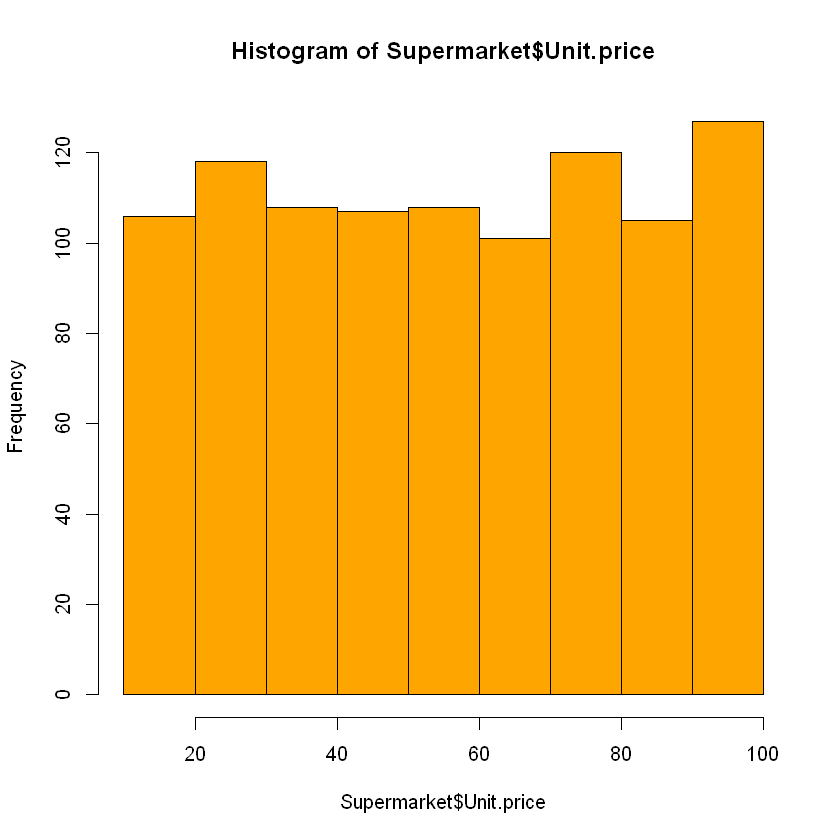

In [37]:
hist(x=Supermarket$Unit.price,col='orange')

In [ ]:
#To make a barplot showing total gross income of each city

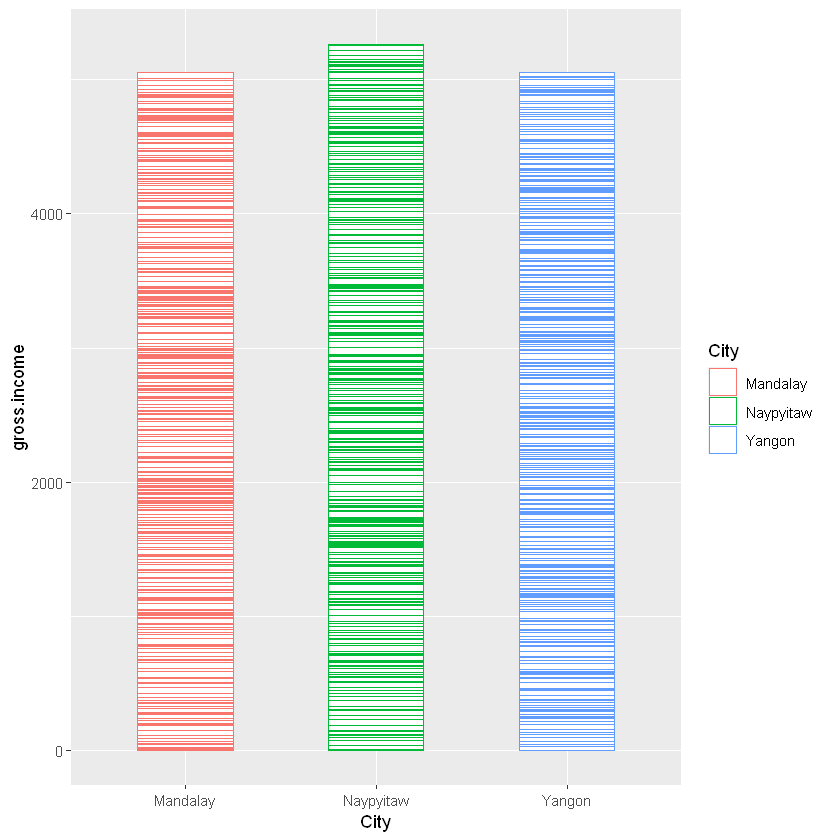

In [40]:
ggplot(data=Supermarket, aes(x=City, y=gross.income,color=City)) +
  geom_bar(stat='identity',fill='white',width=0.5)

In [75]:
Data <- data.frame(Customer=c('Member','Normal'),value=c(501,499))

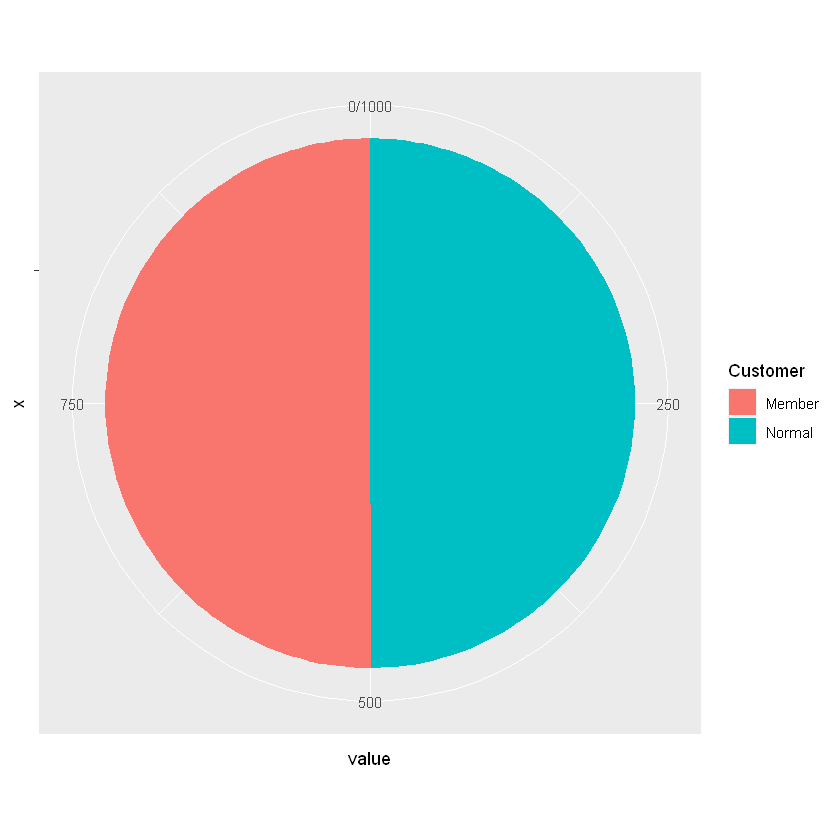

In [76]:
ggplot(data=Data, aes(x="",y=value,fill=Customer)) +
  geom_bar(stat="identity", width=1) +
  coord_polar("y", start=0)